In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

In [2]:
x = np.fromfile('bits_800bps.f32', dtype = 'float32')[20000:]
off = 2
z = x[off:x.size//8*8+off].reshape((-1,8))

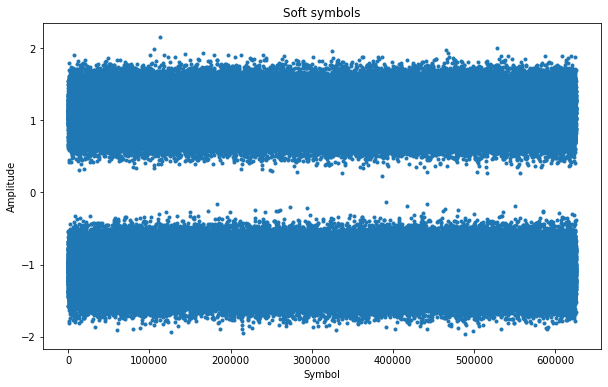

In [3]:
plt.figure(figsize = (10,6), facecolor = 'w')
plt.plot(x, '.')
plt.ylabel('Amplitude')
plt.title('Soft symbols')
plt.xlabel('Symbol');

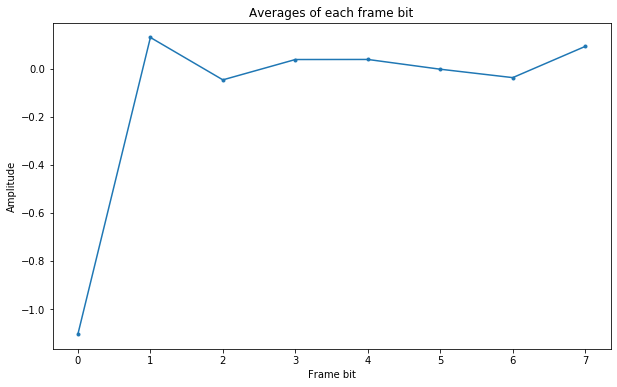

In [4]:
plt.figure(figsize = (10,6), facecolor = 'w')
plt.plot(np.average(z, axis = 0), '.-')
plt.title('Averages of each frame bit')
plt.ylabel('Amplitude')
plt.xlabel('Frame bit');

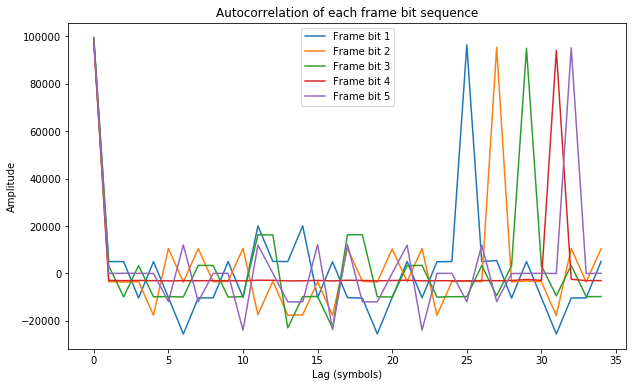

In [5]:
plt.figure(figsize = (10,6), facecolor = 'w')
for j in range(1,6):
    corr = scipy.signal.correlate(z[:,j], z[:,j], mode = 'full')
    plt.plot(corr[corr.size//2:][:35], label = f'Frame bit {j}')
plt.title('Autocorrelation of each frame bit sequence')
plt.ylabel('Amplitude')
plt.xlabel('Lag (symbols)')
plt.legend();

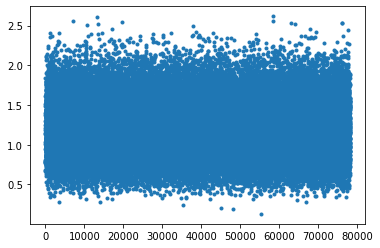

In [6]:
plt.plot(-z[:,6] * z[:,4], '.')

In [7]:
b = -z[:,7] * z[:,3] # note bit 3 instead of 2

In [8]:
np.where(np.convolve(np.all(np.sign(z[:,(1,5)]) == [1,1], axis = 1), np.ones(5)) == 5)

(array([  283,  1083,  1883,  2683,  3483,  4283,  5083,  5883,  6683,
         7483,  8283,  9083,  9883, 10683, 11483, 12283, 13083, 13883,
        14683, 15483, 16283, 17083, 17883, 18683, 19483, 20283, 21083,
        21883, 22683, 23483, 24283, 25083, 25883, 26683, 27483, 28283,
        29083, 29883, 30683, 31483, 32283, 33083, 33883, 34683, 35483,
        36283, 37083, 37883, 38683, 39483, 40283, 41083, 41883, 42683,
        43483, 44283, 45083, 45883, 46683, 47483, 48283, 49083, 49883,
        50683, 51483, 52283, 53083, 53883, 54683, 55483, 56283, 57083,
        57883, 58683, 59483, 60283, 61083, 61883, 62683, 63483, 64283,
        65083, 65883, 66683, 67483, 68283, 69083, 69883, 70683, 71483,
        72283, 73083, 73883, 74683, 75483, 76283, 77083, 77883]),)

In [9]:
z[283-4:284,(1,5)]

array([[0.9908856, 1.1165041],
       [1.0083642, 1.1007323],
       [1.15526  , 1.6971315],
       [0.8049949, 1.1295491],
       [0.8837602, 0.9101658]], dtype=float32)

In [10]:
framestart = 284-1

In [11]:
bb = 1*(b[framestart:] > 0)
bb = bb[:bb.size//200*200].reshape((-1,200))

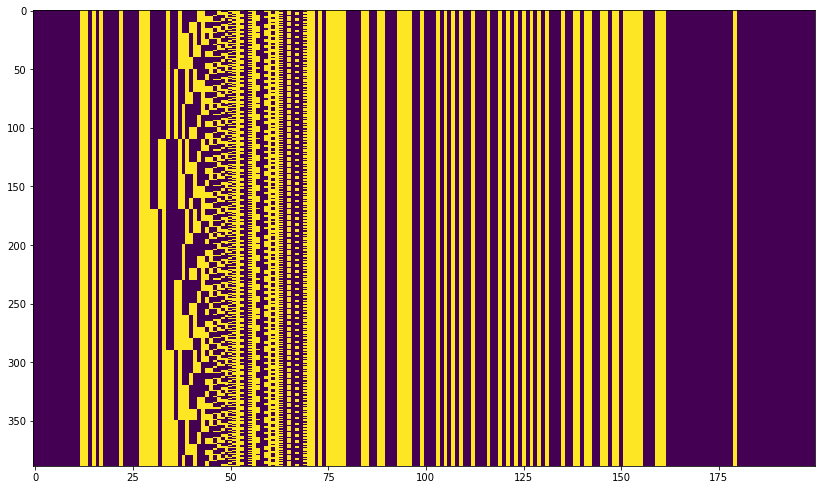

In [12]:
plt.figure(figsize = (14,10))
plt.imshow(bb, aspect = 0.3)

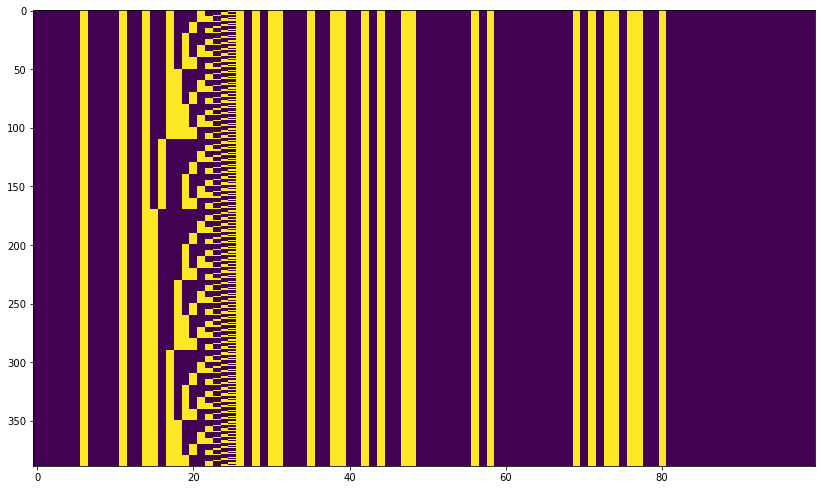

In [13]:
plt.figure(figsize = (14,10))
plt.imshow(bb[:,::2], aspect = 0.15)

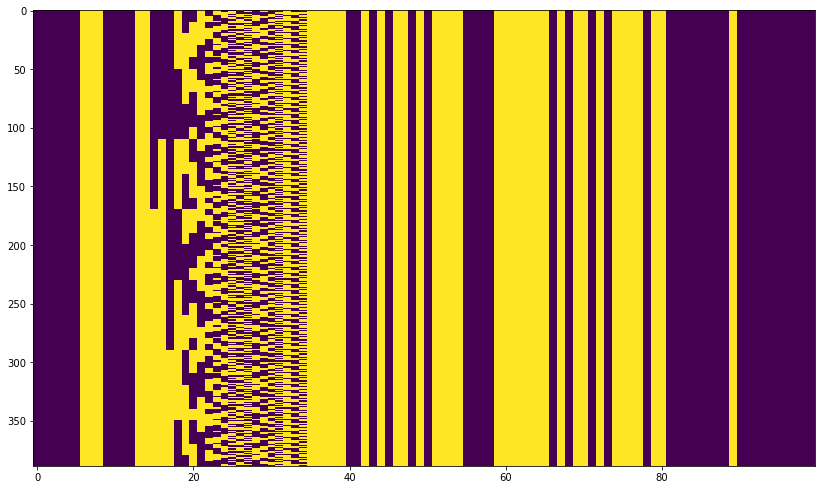

In [14]:
plt.figure(figsize = (14,10))
plt.imshow(bb[:,1::2], aspect = 0.15)

In [15]:
seconds = (np.packbits(bb[:,23*2:27*2:2], axis = 1).ravel() >> 4).astype('int')
ten_seconds = (np.packbits(bb[:,20*2:23*2:2], axis = 1).ravel() >> 5).astype('int')
minutes = (np.packbits(bb[:,16*2:20*2:2], axis = 1).ravel() >> 4).astype('int')
ten_minutes = (np.packbits(bb[:,13*2:16*2:2], axis = 1).ravel() >> 5).astype('int')

np.diff(seconds + 10 * ten_seconds + 60 * minutes + 600 * ten_minutes)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,